# Mendeteksi data/value tak wajar

Salah satu cara dalam data cleansing untuk membersihkan sebuah data tak wajar dalam sebuah dataframe, dalam data ini kita akan bersihkan dalam column EOP_BAL_CS

In [1]:
import pandas as pd #toolsb

In [2]:
#Import Data
Trset = pd.read_csv('TrSet.csv')
Trset

,CUST_NO,VTG,AGETIER,EDUCATION_DESC,GENDER,EOP_BAL_CS,MTH_AVG_BAL_CS,MTH6_AVG_BAL_CS,DELTA_FUNDING_BALANCE,MTH_AVG_BAL_IDR,...,AVG_CREDIT_3MTH,SUM_CREDIT_LESS_3MIL,SUM_CREDIT_ZERO,DELTA_CREDIT_MUTATION,DELTA_DEBIT_MUTATION,AVG_DEBIT_3MTH,CUST_SEGMENT_AVG,DELTA_CUST_SEG,L_COLL,BAD_TAG
0,2730505.6,16-20 th,21-30 th,UNIVERSITAS,P,2.056059e+07,1.984331e+07,8.539044e+06,-1.348543e+07,1.984331e+07,...,2.498304e+07,0,0,-1.623916e+07,-1.062066e+07,1.949566e+07,4,0,0,0
1,2734315.2,16-20 th,41-50 th,UNIVERSITAS,L,9.170948e+05,2.694370e+06,1.951391e+07,3.405224e+07,2.694370e+06,...,1.124538e+07,0,0,-6.775181e+06,-2.692690e+06,1.276439e+07,5,0,1,0
2,2668305.2,16-20 th,41-50 th,UNIVERSITAS,L,4.300652e+05,1.719333e+06,1.974608e+06,7.410419e+05,1.719333e+06,...,1.474981e+07,1,0,8.661768e+06,1.129421e+07,1.463569e+07,5,0,0,0
3,2526375.6,16-20 th,41-50 th,UNIVERSITAS,L,4.348930e+06,1.373424e+06,1.874303e+06,1.571728e+06,1.373424e+06,...,6.541202e+06,0,0,3.685779e+06,8.645953e+05,6.047069e+06,5,0,0,0
4,2437968.4,16-20 th,51-65 th,SMA,L,6.702202e+07,1.855625e+08,2.803859e+08,4.921136e+08,1.855625e+08,...,1.017353e+09,0,0,-2.065421e+08,7.833901e+08,1.034371e+09,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43621,7749589.4,1 th,21-30 th,SMA,L,9.897000e+05,6.301286e+05,6.398094e+05,-5.737353e+04,6.301286e+05,...,3.631500e+06,1,0,-6.452000e+05,3.802667e+05,3.540033e+06,5,0,0,0
43622,7801324.8,1 th,31-40 th,AKADEMI,P,8.365746e+06,2.129412e+06,9.997117e+05,-8.284994e+05,2.129412e+06,...,2.065541e+07,1,1,-1.554145e+05,2.162427e+06,1.788757e+07,5,1,0,0
43623,7803506.8,1 th,21-30 th,UNIVERSITAS,L,2.424743e+07,1.738847e+07,7.323877e+06,-1.275150e+07,1.738847e+07,...,1.110606e+07,2,0,-9.906002e+06,-5.826008e+06,5.826008e+06,4,0,0,0
43624,4734476.0,6-10 th,31-40 th,SMA,L,1.670087e+07,7.784549e+06,8.533363e+06,1.212635e+06,7.784549e+06,...,1.201513e+08,0,0,-2.037767e+07,1.908234e+07,1.207426e+08,4,0,0,0


In [3]:
#get numeric column
numeric_column = list(Trset._get_numeric_data())
numeric_column

['CUST_NO',
 'EOP_BAL_CS',
 'MTH_AVG_BAL_CS',
 'MTH6_AVG_BAL_CS',
 'DELTA_FUNDING_BALANCE',
 'MTH_AVG_BAL_IDR',
 'MTH6_AVG_BAL_IDR',
 'DELTA_FUNDING_BALANCE_TD',
 'AVG_CREDIT_3MTH',
 'SUM_CREDIT_LESS_3MIL',
 'SUM_CREDIT_ZERO',
 'DELTA_CREDIT_MUTATION',
 'DELTA_DEBIT_MUTATION',
 'AVG_DEBIT_3MTH',
 'CUST_SEGMENT_AVG',
 'DELTA_CUST_SEG',
 'L_COLL',
 'BAD_TAG']

In [6]:
#get categorical column
categorical_column = list(set(Trset.columns.values)-set(numeric_column))
categorical_column

['EDUCATION_DESC', 'VTG', 'AGETIER', 'GENDER']

In [8]:
#get distribution (numeric)
n_describe = Trset.describe(percentiles = [0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99]).T
n_describe

,count,mean,std,min,1%,10%,20%,30%,40%,50%,60%,70%,80%,90%,99%,max
CUST_NO,43626.0,5.307595e+06,1.772470e+06,4.198000e+02,2.881072e+05,2.720156e+06,4.061167e+06,4.698626e+06,5.173164e+06,5.591395e+06,5.998224e+06,6.422405e+06,6.908272e+06,7.370606e+06,7.798126e+06,7.883086e+06
EOP_BAL_CS,43626.0,5.065286e+07,3.409452e+08,0.000000e+00,1.069200e+04,1.010066e+05,5.366513e+05,1.317250e+06,2.410131e+06,3.850286e+06,6.129508e+06,1.108976e+07,2.407691e+07,7.301638e+07,8.842333e+08,4.646769e+10
MTH_AVG_BAL_CS,43626.0,5.001239e+07,3.329323e+08,0.000000e+00,7.272755e+03,2.628410e+05,5.816167e+05,1.020445e+06,1.741216e+06,3.071386e+06,5.655637e+06,1.084738e+07,2.421992e+07,7.453452e+07,8.809052e+08,4.674896e+10
MTH6_AVG_BAL_CS,43626.0,4.803665e+07,2.591684e+08,0.000000e+00,5.035026e+04,3.674444e+05,7.211356e+05,1.212863e+06,1.975656e+06,3.295061e+06,5.741804e+06,1.073658e+07,2.289187e+07,7.300630e+07,8.529682e+08,1.933949e+10
DELTA_FUNDING_BALANCE,43350.0,-6.987096e+06,2.214107e+08,-3.254176e+10,-3.231933e+08,-2.002008e+07,-5.720430e+06,-2.098101e+06,-7.746591e+05,-2.414632e+05,4.922135e+03,3.236117e+05,1.367397e+06,7.342369e+06,2.117110e+08,9.706924e+09
MTH_AVG_BAL_IDR,43626.0,7.049648e+07,6.063119e+08,0.000000e+00,7.272755e+03,2.638319e+05,5.846084e+05,1.029317e+06,1.760873e+06,3.134012e+06,5.834571e+06,1.145187e+07,2.670038e+07,9.094529e+07,1.171146e+09,7.660006e+10
MTH6_AVG_BAL_IDR,43626.0,6.544131e+07,5.375834e+08,0.000000e+00,4.801341e+04,3.635067e+05,7.197783e+05,1.212626e+06,1.983891e+06,3.328721e+06,5.884069e+06,1.126690e+07,2.478268e+07,8.628335e+07,1.097575e+09,7.698888e+10
DELTA_FUNDING_BALANCE_TD,43626.0,-1.251689e+07,3.070351e+08,-3.547618e+10,-4.393825e+08,-2.197492e+07,-6.251708e+06,-2.249232e+06,-8.454631e+05,-2.785403e+05,-1.244894e+04,2.875175e+05,1.271148e+06,7.015832e+06,2.131296e+08,9.706924e+09
AVG_CREDIT_3MTH,43626.0,1.234624e+08,1.118343e+09,0.000000e+00,8.339538e+05,4.257089e+06,5.891049e+06,7.825843e+06,1.056497e+07,1.469872e+07,2.170333e+07,3.486535e+07,6.377367e+07,1.620466e+08,1.655352e+09,8.694331e+10
SUM_CREDIT_LESS_3MIL,43626.0,4.679090e-01,1.094603e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00,6.000000e+00


In [13]:
#get distribution (numeric)
c_describe = pd.DataFrame()
for f in categorical_column:
    dist = pd.DataFrame(Trset[f].unique(),columns = [f])#getting unique values
    c_describe = pd.concat([c_describe,dist],ignore_index=True,axis=1) #concatting/penggabungan
c_describe.columns=categorical_column

c_describe

,EDUCATION_DESC,VTG,AGETIER,GENDER
0,UNIVERSITAS,16-20 th,21-30 th,P
1,SMA,> 20 th,41-50 th,L
2,AKADEMI,11-15 th,51-65 th,NaN
3,SMP,6-10 th,31-40 th,NaN
4,SD,5 th,NaN,NaN
5,NaN,4 th,NaN,NaN
6,NaN,3 th,NaN,NaN
7,NaN,2 th,NaN,NaN
8,NaN,1 th,NaN,NaN


In [15]:
#export data to excel
path = r"C:\PROJECT\Data Science\Anaconda\Fundamental\Cleansing_Unique.xlsx"
writer = pd.ExcelWriter(path,engine = 'xlsxwriter')
n_describe.to_excel(writer, sheet_name = 'variabel numerik')
c_describe.to_excel(writer, sheet_name = 'variabel kategori')
writer.close()

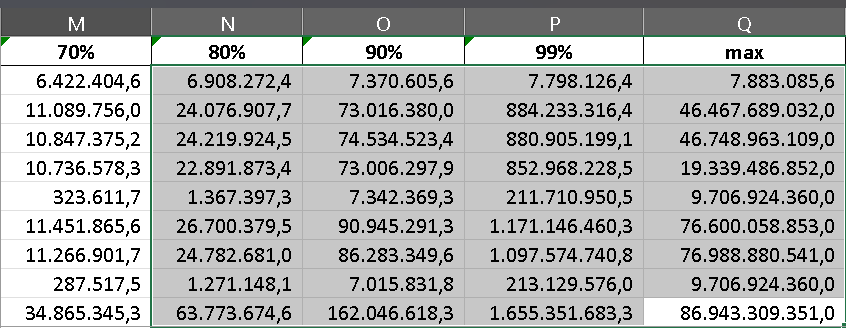

Dari gambar diatas dapat dilihat dari baris ke-2 (EOP_BAL_CS) terjadi outlier yang cukup ekstrim antara persentil 90% ke 99% dan max, maka dari itu data perlu dibersihkan/diwajarkan agar hasil apabila data ditraining akan semakin bagus.

In [16]:
Trset['EOP_BAL_CS'].loc[Trset['EOP_BAL_CS'] > 73000000 ] = 73000000 #to 90% percentil

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11844\1740194698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Trset['EOP_BAL_CS'].loc[Trset['EOP_BAL_CS'] > 73000000 ] = 73000000


In [17]:
#check
Trset.head()

,CUST_NO,VTG,AGETIER,EDUCATION_DESC,GENDER,EOP_BAL_CS,MTH_AVG_BAL_CS,MTH6_AVG_BAL_CS,DELTA_FUNDING_BALANCE,MTH_AVG_BAL_IDR,...,AVG_CREDIT_3MTH,SUM_CREDIT_LESS_3MIL,SUM_CREDIT_ZERO,DELTA_CREDIT_MUTATION,DELTA_DEBIT_MUTATION,AVG_DEBIT_3MTH,CUST_SEGMENT_AVG,DELTA_CUST_SEG,L_COLL,BAD_TAG
0,2730505.6,16-20 th,21-30 th,UNIVERSITAS,P,20560590.01,1.984331e+07,8.539044e+06,-1.348543e+07,1.984331e+07,...,2.498304e+07,0,0,-1.623916e+07,-1.062066e+07,1.949566e+07,4,0,0,0
1,2734315.2,16-20 th,41-50 th,UNIVERSITAS,L,917094.84,2.694370e+06,1.951391e+07,3.405224e+07,2.694370e+06,...,1.124538e+07,0,0,-6.775181e+06,-2.692690e+06,1.276439e+07,5,0,1,0
2,2668305.2,16-20 th,41-50 th,UNIVERSITAS,L,430065.24,1.719333e+06,1.974608e+06,7.410419e+05,1.719333e+06,...,1.474981e+07,1,0,8.661768e+06,1.129421e+07,1.463569e+07,5,0,0,0
3,2526375.6,16-20 th,41-50 th,UNIVERSITAS,L,4348929.80,1.373424e+06,1.874303e+06,1.571728e+06,1.373424e+06,...,6.541202e+06,0,0,3.685779e+06,8.645953e+05,6.047069e+06,5,0,0,0
4,2437968.4,16-20 th,51-65 th,SMA,L,67022018.69,1.855625e+08,2.803859e+08,4.921136e+08,1.855625e+08,...,1.017353e+09,0,0,-2.065421e+08,7.833901e+08,1.034371e+09,3,0,0,0
